# Phase II goal:
# Select diseases with verified genetic links and strong market potential

### Example of health statistics
Below is a plot showing a snapshot of the time-evolution of the US population across a 50 year gap, 1960-2010. Clearly there is a huge population at 45-60 that will be reaching retirement age soon suggesting a large market developing for treatments of aging-related diseases.

The data is from The World Bank's HealthStats database.<br>
http://data.worldbank.org/topic/health

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

In [2]:
health = 'HNPStats-Data.csv'

# Roll through gzip csv file using pandas reader
readerh = pd.read_csv(health, sep=',', iterator=True, chunksize=10000)

# Concatenate to build dataframe
dfh = pd.concat(readerh, ignore_index=True)

In [3]:
# Isolate relevant data
dfpop = dfh[(dfh['Indicator Code'].str.contains('SP.POP')) & 
            (dfh['Country Name']=='United States')]
dfnew = dfpop[~dfpop['Indicator Name'].str.contains('%')]
dfnew = dfnew[~dfnew['Indicator Name'].str.contains('Age')]
dffemale = dfnew[dfnew['Indicator Name'].str.contains('^Female')]
dfmale = dfnew[dfnew['Indicator Name'].str.contains('^Male')]

((17, 60), (17, 60))

In [4]:
dffemale.head()

,Indicator Name,Indicator Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
23452,Female population 00-04,SP.POP.0004.FE,United States,USA,9861449,9969017,9961475,9860818,9712001,9538861,...,9954928,10035849,10005959,9928891,9868244,9848425,9776359,9690818,9628816,NaN
23699,Female population 05-09,SP.POP.0509.FE,United States,USA,9176265,9350772,9526951,9701821,9858884,9958625,...,9515871,9606187,9737304,9863058,9931838,9963715,10005135,10043786,10072171,NaN
23946,Female population 10-14,SP.POP.1014.FE,United States,USA,8211916,8490094,8718624,8910582,9092310,9273332,...,10204367,10140382,10084580,10054747,10068199,9998130,9962935,9980136,10031355,NaN
24193,Female population 15-19,SP.POP.1519.FE,United States,USA,6570746,6920982,7299947,7677605,8023754,8317092,...,10390461,10453739,10519997,10560535,10571066,10630074,10591178,10441414,10237806,NaN
24440,Female population 20-24,SP.POP.2024.FE,United States,USA,5634671,5782701,5972224,6209068,6492852,6805012,...,10307433,10385672,10441119,10480863,10521006,10593452,10732605,10939307,11144273,NaN


## Quick visualization

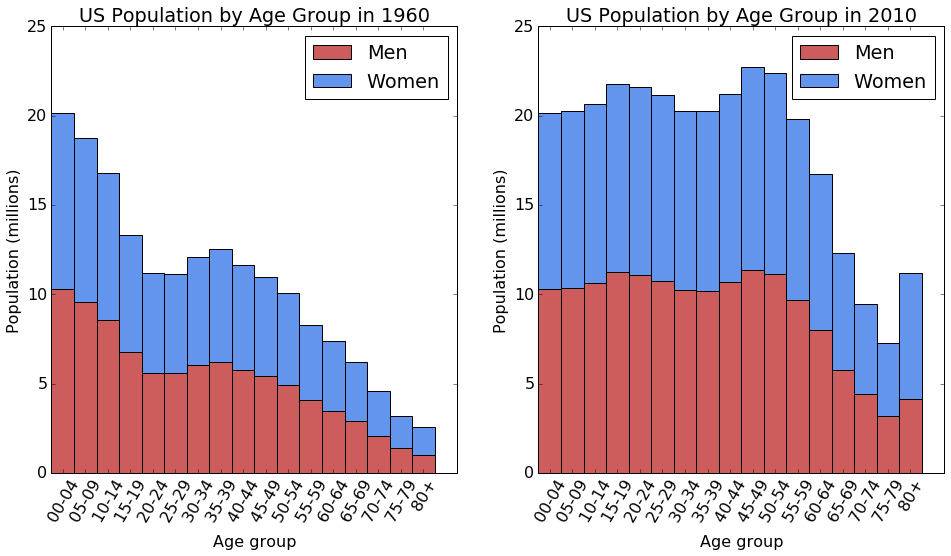

In [6]:
# Stacked bar plot showing age breakdown of US population at 50 year interval
yrrng = range(1960,2010,5)
years = [str(yr) for yr in yrrng]

width=1
n = len(dfmale['1960'])
lbls = dfmale['Indicator Name'].str.replace('Male population','').tolist()
yrdate = ['1960','2010']
plt.ioff()

plt.rc('font', size='16')

fig, axes = plt.subplots(1,2,figsize=(16,8))
for ax,yr in zip(axes,yrdate):
    ax.bar(range(n), dfmale[yr]/1e6, width, color='IndianRed')
    ax.bar(range(n), dffemale[yr]/1e6, width, color='CornflowerBlue', 
                bottom=dfmale[yr]/1e6)
    ax.set_xlabel('Age group')
    ax.set_xticks(np.arange(n) + width/2.)
    ax.set_xticklabels(lbls, rotation=60)
    ax.legend(('Men', 'Women'))
    ax.set_ylabel('Population (millions)')
    ax.set_title('US Population by Age Group in '+yr)
    
    
plt.show()

## Refine data

Of more interest is the aging of the entire population, extrapolated out a few years to account for time to bring a potential therapy to market.

In [12]:
# Combine male and female data for each age group and year
dftot = dfmale.append(dffemale)
dftot.index.name='Age Group'
dftot = dftot.set_index(np.arange(dftot.shape[0]))

# Remove unwanted non-numerical data, country name and code
for col in ['Indicator Code','Country Name','Country Code']:
    dftot = dftot.drop(col, axis=1)

# Remove columns will all NaN values, i.e., 2015
for col in dftot.columns:
    if len(dftot[col].value_counts())==0:
        dftot = dftot.drop(col, axis=1)

# Remove male, female, population from Indicator Name
crop1 = 'Male population '
crop2 = 'Female population '
dftot['Indicator Name'] = dftot['Indicator Name'].str.replace(crop1,'').str.replace(crop2,'')
print(dftot['Indicator Name'].tolist())

['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+', '00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']


In [8]:
# # Drop male, female, population from Indicator Name and sum dfmale and dffemale
# dfmale['Indicator Name'] = dfmale['Indicator Name'].str.replace('Male population ','')
# dffemale['Indicator Name'] = dffemale['Indicator Name'].str.replace('Female population ','')

# # Remove non-numerical data
# for col in ['Indicator Code','Country Name','Country Code']:
#     dfmale = dfmale.drop(col, axis=1)
#     dffemale = dffemale.drop(col, axis=1)
    
# # Remove columns will all NaN values
# for col in dfmale.columns:
#     if len(dfmale[col].value_counts())==0:
#         dfmale = dfmale.drop(col, axis=1)
        

In [14]:
# Now that indicator names are the same for male and female data,
# Split then sum dataframe to get total population at each year
dftot = dftot.set_index('Indicator Name')
dfcomb = dftot[:int(dftot.shape[0]/2)] + dftot[int(dftot.shape[0]/2):]

In [15]:
# A bit more age groups than necessary, visualization will be difficult, drop 17 to 5
dfsum = pd.DataFrame(columns=dfcomb.columns, index=['00-19','20-39','40-59','60-79','80+'])
for i in range(dfcomb.shape[0]//4):
    dfsum.ix[i] = dfcomb[i*4:4*(i+1)-1].sum(axis=0).astype(int)
dfsum.ix[-1] = dfcomb.ix[-1].astype(int)
dfsum.index.name='Age Group'
dfsum

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Age Group,,,,,,,,,,,,,,,,,,,,,
00-19,55652015,56780815,57557502,58054227,58399658,58592658,58648104,58594247,58405962,58107960,...,60368701,60773348,60976339,61053496,61075875,61106724,60958930,60805827,60735545,60765798
20-39,34364811,34467523,34706420,35102638,35684849,36424643,37351515,38417035,39562576,40773017,...,60657223,61057910,61528193,62046466,62545845,63030249,63575405,64342634,65320523,66340107
40-59,32639796,33090832,33521274,33914420,34271419,34563873,34837371,35097822,35312902,35484229,...,65394171,65859127,66204034,66423361,66458160,66328453,66002708,65637100,65251023,64808717
60-79,18188070,18401290,18597179,18784342,19001293,19267567,19561745,19920837,20306719,20702822,...,31889977,32834662,34027309,35421711,36919462,38481135,39945495,41468539,43040866,44665327
80+,2547551,2718034,2864668,2977596,3053752,3094152,3283817,3447027,3576230,3670647,...,10029919,10336642,10623394,10882640,11084626,11214595,11429622,11617411,11790736,11947885


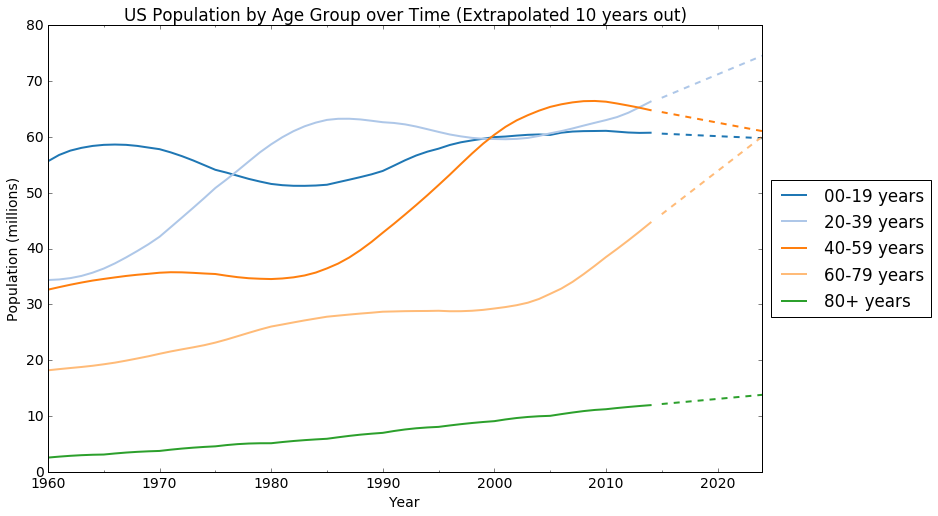

In [26]:
# Create graph with linear extrapolation

# Generate colors for graphs
colorseq = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
            '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
            '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
            '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

years = [int(s) for s in dfcomb.columns.tolist()]

lbls = dfsum.index.tolist()
n = len(lbls)
yy = dfsum/1e6

# Since data is collected from dataframe, give column labels as strings not integers
yrtrends = [str(i) for i in xextrap]
yextrap = dfextrap[yrtrends]/1e6

plt.rc('font', size='14')

# with plt.style.context(('ggplot')):
fig, ax = plt.subplots(1, figsize=(16,8))
for i in range(n):
    plt.plot(years, yy.ix[i], color=colorseq[i], label=lbls[i], lw=2)
for i in range(n):
    plt.plot(xextrap, yextrap.ix[i], color=colorseq[i], label=lbls[i], lw=2, ls='--')
# ax.set_xticklabels(years) #, rotation=60)
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
ax.set_title('US Population by Age Group over Time (Extrapolated 10 years out)')
ax.set_xlim(years[0],int(yrtrends[-1]))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

# Shrink current axis by 20% and place legend outside
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend([s+' years' for s in lbls],bbox_to_anchor=(1,0.5),loc='center left')

plt.show()

### Refine graph

Graph would make more sense if all age groups were summed together to better visualize the overall change in population.

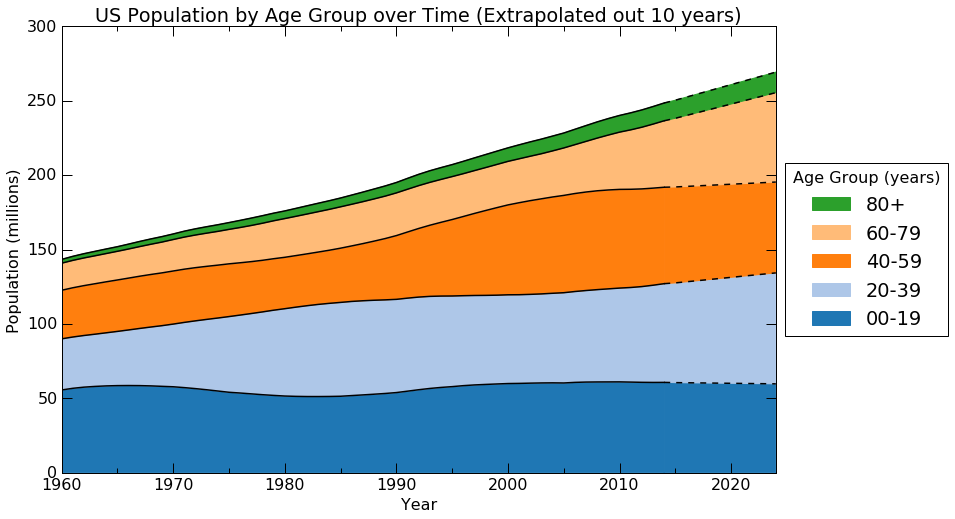

In [33]:
# Add this information to previous graph

import matplotlib.patches as mpatches

yrtrends = np.arange(2014,2025)
idxtrend = [str(i) for i in yrtrends]
yextrap = dfextrap[idxtrend]/1e6

plt.rc('font', size=16)

# with plt.style.context(('ggplot')):
fig, ax = plt.subplots(1, figsize=(16,8))

patches=[]

for i in range(n):
    if i==0:
        ysum = yy.ix[0]
        plt.fill_between(years,ysum,color=colorseq[i])
        ytsum = yextrap.ix[0]
        plt.fill_between(yrtrends,ytsum,color=colorseq[i])
    else:
        ysum = ysum + yy.ix[i]
        plt.fill_between(years,ysum,ysum-yy.ix[i],color=colorseq[i])
        ytsum = ytsum + yextrap.ix[i]
        plt.fill_between(yrtrends,ytsum,ytsum-yextrap.ix[i],color=colorseq[i])
    plt.plot(years, ysum, color='k', lw=1.5)
    plt.plot(yrtrends, ytsum, color='k', lw=1.5, ls='--')
    patches.append(mpatches.Patch(color=colorseq[n-1-i], label=lbls[n-1-i]))
#     plt.axvline(2014,color='k',lw=1,ls='--')
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
ax.set_title('US Population by Age Group over Time (Extrapolated out 10 years)')
ax.set_xlim(years[0],yrtrends[-1])
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params('both', length=10, width=1, which='major')
ax.tick_params('both', length=5, width=1, which='minor')

# Shrink current axis by 20% and place legend outside
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(handles=patches, bbox_to_anchor=(1,0.5),loc='center left', title=dfsum.index.name+' (years)')

plt.show()

## Discussion

To put this information to use would require determining the most common age-related diseases or disease categories. The weights/scores of the  already existing gene-disease associations can be adjusted accordingly. This additional market information will help businesses identify the disease areas and corresponding genetic targets with the highest potential for financial and technical success.